In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import gym
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
#from hiive.mdptoolbox.openai import OpenAI_MDPToolbox
import warnings
warnings.filterwarnings("ignore")

In [4]:

class OpenAI_MDPToolbox:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self, openAI_env_name:str, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        self.env = gym.make(self.env_name, **kwargs)
        self.env.reset(seed = 5)

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob

In [5]:
np.random.seed(23)
mdp_p, mdp_r = forest(S=20, r1=10, r2=2, p=0.1)
gamma_val = [0.2,0.4,0.6,0.8, 0.9]

val_iter_df = pd.DataFrame()
pol_iter_df = pd.DataFrame()
init_time = time.time()
for i in gamma_val:
    vi = ValueIteration(mdp_p, mdp_r, gamma=i, epsilon = 0.0001)
    vi_df = pd.DataFrame(vi.run())
    vi_df['gamma'] = i
    val_iter_df = val_iter_df.append(vi_df)
    pit = PolicyIteration(mdp_p, mdp_r, gamma=i)
    pi_df = pd.DataFrame(pit.run())
    pi_df['gamma'] = i
    pol_iter_df = pol_iter_df.append(pi_df)

print("Time taken:", time.time() - init_time)

Time taken: 0.08567500114440918


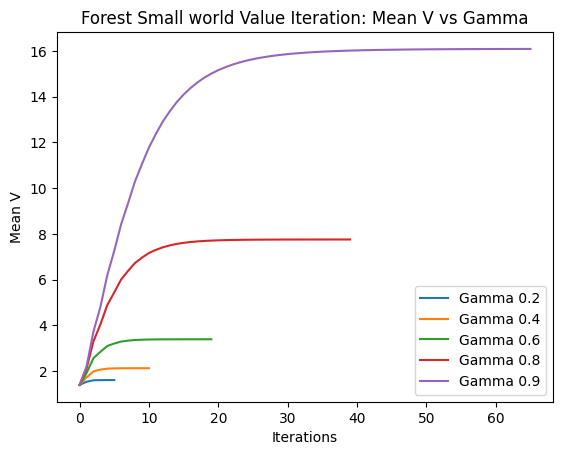

In [7]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Mean V'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Mean V'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Mean V'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Mean V'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Mean V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Small world Value Iteration: Mean V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_vi_meanv_gamma.png')
plt.show()

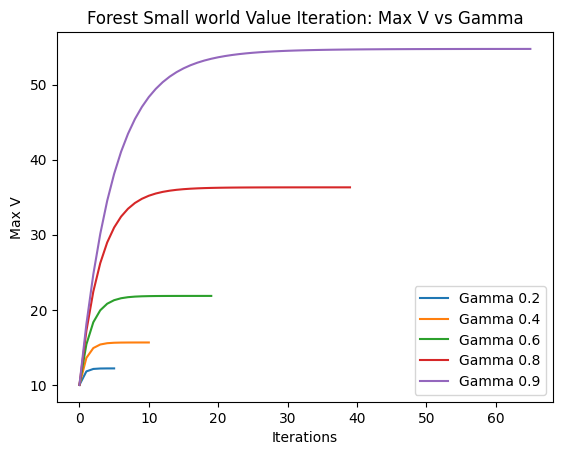

In [9]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Max V'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Max V'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Max V'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Max V'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Max V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Small world Value Iteration: Max V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_vi_maxv_gamma.png')
plt.show()

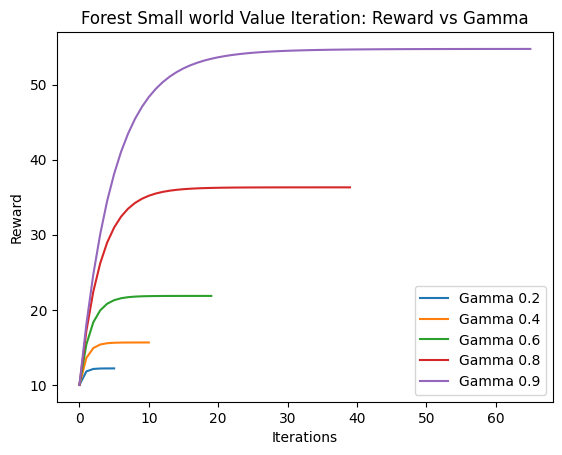

In [10]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Reward'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Reward'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Reward'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Reward'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Reward'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Small world Value Iteration: Reward vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_vi_reward_gamma.png')
plt.show()

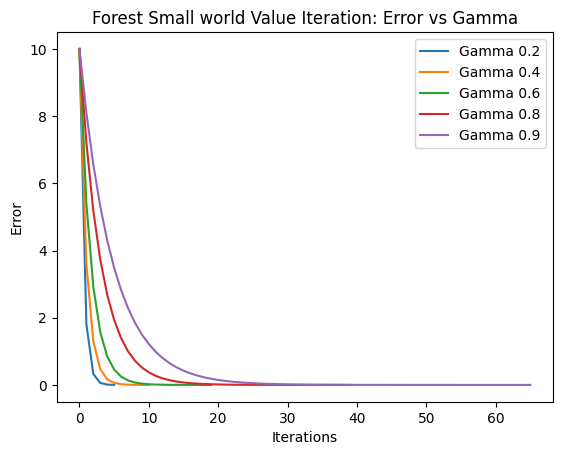

In [11]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Error'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Error'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Error'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Error'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Error'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Forest Small world Value Iteration: Error vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_vi_error_gamma.png')
plt.show()

In [33]:
vi = ValueIteration(mdp_p, mdp_r, gamma=0.9, epsilon = 0.0001)
pi = PolicyIteration(mdp_p, mdp_r, gamma=0.9)
vi.run()
pi.run()
vi_policy = vi.policy
pi_policy = pi.policy
print(vi_policy)
print(pi_policy)

(0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
(0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


          gamma      Time  Iteration      Max V
gamma                                          
0.2   5     0.2  0.001799          6  12.199340
0.4   10    0.4  0.000427         11  15.652345
0.6   19    0.6  0.000663         20  21.853337
0.8   39    0.8  0.001326         40  36.311911
0.9   65    0.9  0.002248         66  54.746812


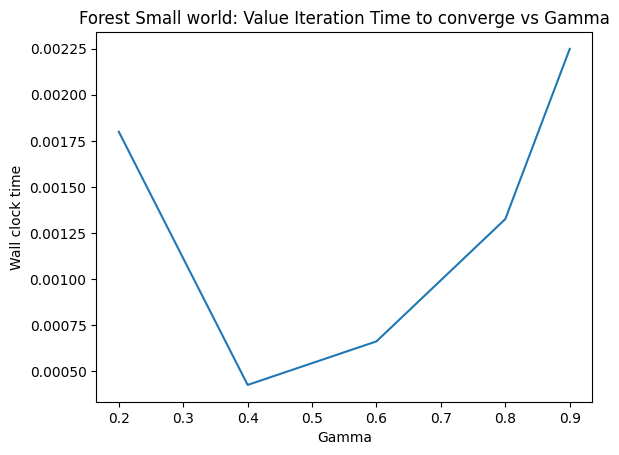

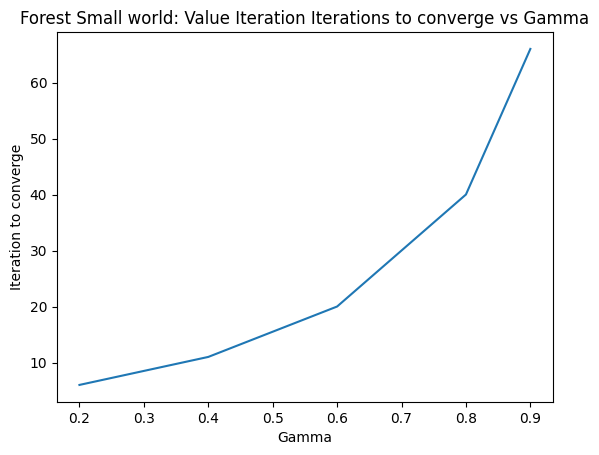

In [12]:
vlg = pd.DataFrame(val_iter_df[['gamma','Time','Iteration','Max V']].
                   groupby('gamma').apply(lambda x: x.iloc[[ -1]]))
print(vlg)

plt.plot(vlg['gamma'], vlg['Time'])
plt.xlabel('Gamma')
plt.ylabel('Wall clock time')
plt.title('Forest Small world: Value Iteration Time to converge vs Gamma')
plt.savefig('./plots/forest_small_vi_time_gamma.png')
plt.show()

plt.plot(vlg['gamma'], vlg['Iteration'])
plt.xlabel('Gamma')
plt.ylabel('Iteration to converge')
plt.title('Forest Small world: Value Iteration Iterations to converge vs Gamma')
plt.savefig('./plots/forest_small_vi_iterations_gamma.png')
plt.show()

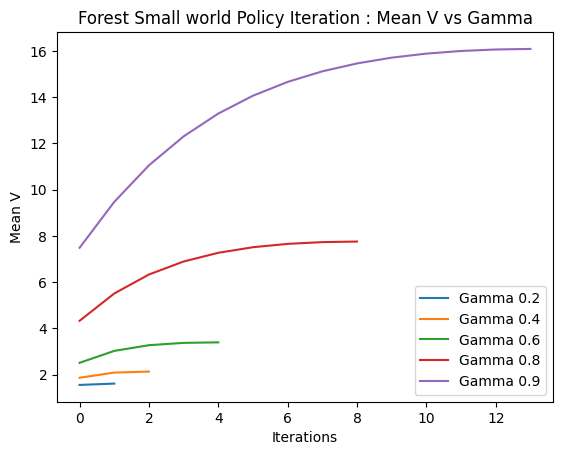

In [13]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Mean V'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Mean V'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Mean V'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Mean V'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Mean V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Small world Policy Iteration : Mean V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_pi_meanv_gamma.png')
plt.show()

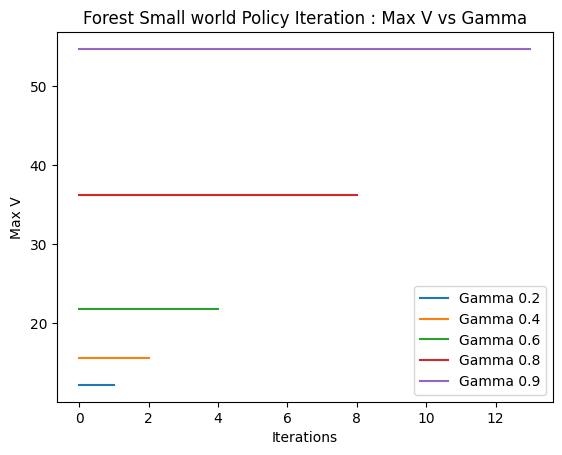

In [14]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Max V'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Max V'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Max V'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Max V'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Max V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Small world Policy Iteration : Max V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_pi_maxv_gamma.png')
plt.show()

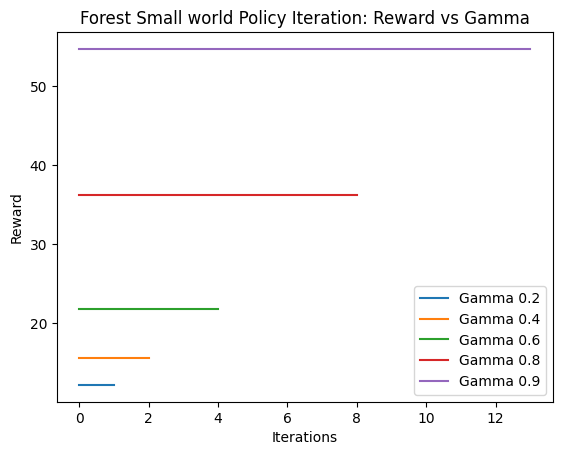

In [15]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Reward'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Reward'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Reward'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Reward'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Reward'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Small world Policy Iteration: Reward vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_pi_reward_gamma.png')
plt.show()

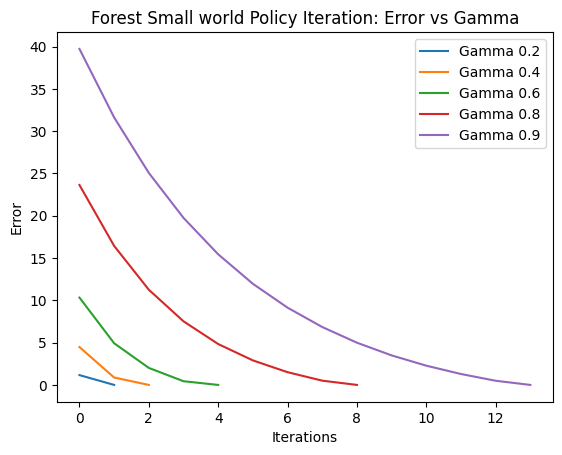

In [16]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Error'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Error'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Error'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Error'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Error'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Forest Small world Policy Iteration: Error vs Gamma')
plt.legend()
plt.savefig('./plots/forest_small_pi_error_gamma.png')
plt.show()

          gamma      Time  Iteration      Max V
gamma                                          
0.2   1     0.2  0.014209          2  12.199773
0.4   2     0.4  0.000667          3  15.652574
0.6   4     0.6  0.001143          5  21.853473
0.8   8     0.8  0.001755          9  36.312292
0.9   13    0.9  0.003226         14  54.751381


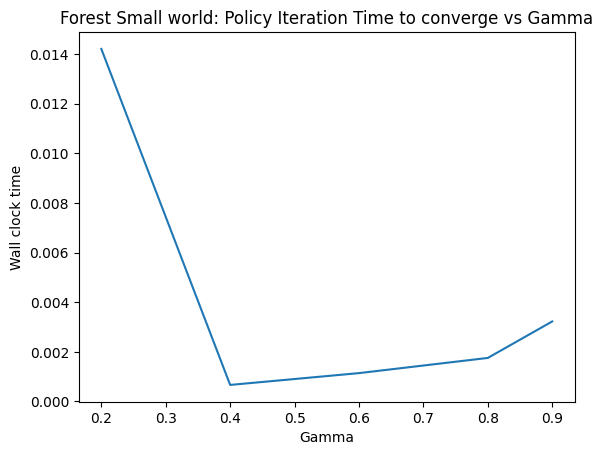

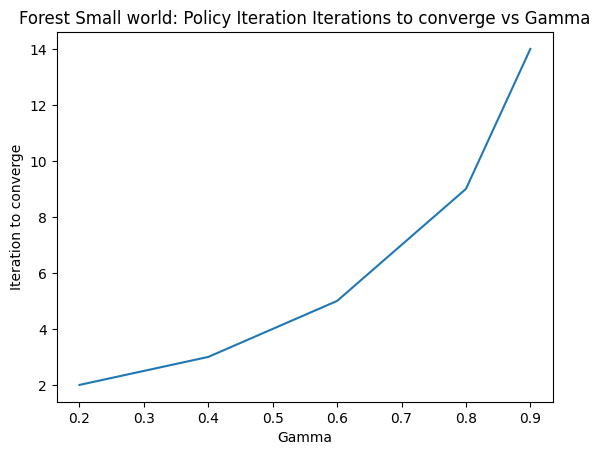

In [17]:
plg = pd.DataFrame(pol_iter_df[['gamma','Time','Iteration','Max V']].
                   groupby('gamma').apply(lambda x: x.iloc[[ -1]]))
print(plg)

plt.plot(plg['gamma'], plg['Time'])
plt.xlabel('Gamma')
plt.ylabel('Wall clock time')
plt.title('Forest Small world: Policy Iteration Time to converge vs Gamma')
plt.savefig('./plots/forest_small_pi_time_gamma.png')
plt.show()

plt.plot(plg['gamma'], plg['Iteration'])
plt.xlabel('Gamma')
plt.ylabel('Iteration to converge')
plt.title('Forest Small world: Policy Iteration Iterations to converge vs Gamma')
plt.savefig('./plots/forest_small_pi_iterations_gamma.png')
plt.show()

# Q Learning

In [18]:
def run_ql(gamma_val=[0.8], alpha_val=[1], epsilon_val=[1], ad=[0.9], ed=[0.95], iteration=[1e5]):
   
    
    ind_size = len(gamma_val)*len(alpha_val)*len(epsilon_val)*len(ad)*len(ed)*len(iteration)
    ql_df = pd.DataFrame(0,index=np.arange(ind_size), 
                         columns=['gamma','alpha','epsilon','alpha_decay','epsilon_decay','time',
                                  'iterations','reward','mean_rewards','max_rewards','error','policy'])
    qlearn_df = pd.DataFrame()
    counter_val = 0
    for j in alpha_val:
        for k in epsilon_val:
            for l in ad:
                for m in ed:
                    for n in iteration:
#                         ql = QLearning(mdp_p, mdp_r, n_iter=n, gamma=0.8, alpha=j, epsilon=k,
#                                        alpha_decay=l, epsilon_decay=m, alpha_min=0.001)
                        ql = QLearning(mdp_p, mdp_r, n_iter=n, gamma=0.9, alpha=j, epsilon=k
                                       )
                        qlo = ql.run()
                        temp_df = pd.DataFrame(qlo)
                        temp_df['gamma'] = 0.9
                        temp_df['alpha'] = j
                        temp_df['epsilon'] = k
                        temp_df['alpha_decay'] = l
                        temp_df['epsilon_decay'] = m
                        temp_df['n_iter'] = n
                        time  = qlo[-1]['Time']
                        iters = qlo[-1]['Iteration']
                        max_val  = qlo[-1]['Max V']
                        max_rewards, mean_rewards, errors = [], [], []
                        for o in qlo:
                            max_rewards.append(o['Max V'])
                            mean_rewards.append(o['Mean V'])
                            errors.append(o['Error']) 
                        policy = np.array(ql.policy)
                        #policy = np.reshape(policy, (15,15))
                        
                        ql_df['gamma'][counter_val] = 0.9
                        ql_df['alpha'][counter_val] = j
                        ql_df['epsilon'][counter_val] = k
                        ql_df['alpha_decay'][counter_val] = l
                        ql_df['epsilon_decay'][counter_val] = m
                        ql_df['time'][counter_val] = time
                        ql_df['iterations'][counter_val] = iters
                        ql_df['reward'][counter_val] = max_val
                        ql_df['mean_rewards'][counter_val] = {tuple(mean_rewards)}
                        ql_df['max_rewards'][counter_val] = {tuple(max_rewards)}
                        ql_df['error'][counter_val] = {tuple(errors)}
                        ql_df['policy'][counter_val] = {ql.policy}
                        
                        counter_val += 1
                        
                        
                        qlearn_df = qlearn_df.append(temp_df)
                        
                        
    return ql_df,qlearn_df
                        

In [19]:
init_time = time.time()
ql_df,qlearn_df = run_ql(gamma_val=[0.9], alpha_val=[0.8], epsilon_val=[0.1,0.2,0.4,0.6,0.8,0.9], ad=[0.9], ed=[0.95], iteration=[1e7])
print("Time taken to run:", time.time() - init_time)

Time taken to run: 1330.8438580036163


In [20]:
ql_df

,gamma,alpha,epsilon,alpha_decay,epsilon_decay,time,iterations,reward,mean_rewards,max_rewards,error,policy
0,0.9,0.8,0.1,0.9,0.95,220.917097,10000000,55.746217,"{(1.5176624600858504, 1.5206742672283318, 1.52...","{(22.10125881869859, 22.10125881869859, 22.090...","{(0.00017064891254099638, 4.6029407308538273e-...","{(0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,..."
1,0.9,0.8,0.2,0.9,0.95,221.544879,10000000,55.478114,"{(0.869415713509806, 0.8939774519000536, 0.912...","{(5.02087019948085, 5.019755158562474, 5.02034...","{(5.756442023228136e-05, 0.00402085836247742, ...","{(0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,..."
2,0.9,0.8,0.4,0.9,0.95,221.337894,10000000,55.030104,"{(1.260938169844946, 1.2711229882194597, 1.276...","{(11.840824467301669, 11.9729707035668, 11.992...","{(0.001746737646156284, 3.6167582860112367e-12...","{(0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,..."
3,0.9,0.8,0.6,0.9,0.95,222.129504,10000000,55.529861,"{(1.18524590384546, 1.2026321383128866, 1.2313...","{(7.678645249682113, 7.914975800247244, 8.3887...","{(8.74957161930281e-05, 0.0014200024709442336,...","{(0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,..."
4,0.9,0.8,0.8,0.9,0.95,221.811812,10000000,54.797635,"{(1.0216415944472086, 1.0385404902985287, 1.07...","{(4.789981644111552, 4.798687819905325, 4.8077...","{(0.004813901393223283, 9.25062487670951e-09, ...","{(0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,..."
5,0.9,0.8,0.9,0.9,0.95,222.821027,10000000,54.779123,"{(1.1841288239828311, 1.1868455690194892, 1.20...","{(5.777415980476463, 5.786838238878415, 6.1392...","{(0.00330140757178291, 7.330763002182828e-05, ...","{(0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,..."


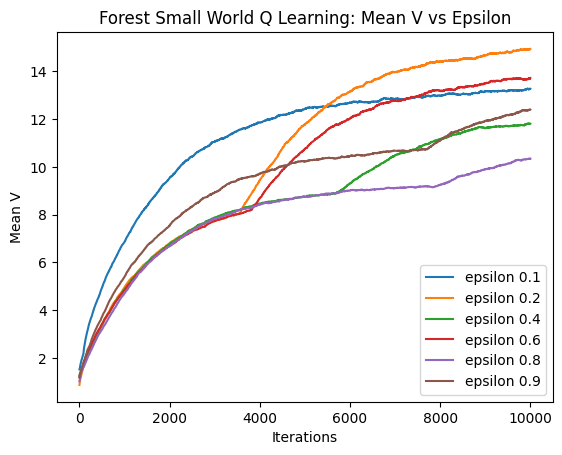

In [23]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Mean V'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Mean V'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Mean V'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Mean V'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Mean V'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Mean V'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Small World Q Learning: Mean V vs Epsilon')
plt.legend()
plt.savefig('./plots/forest_small_QL_meanv_eps.png')
plt.show()

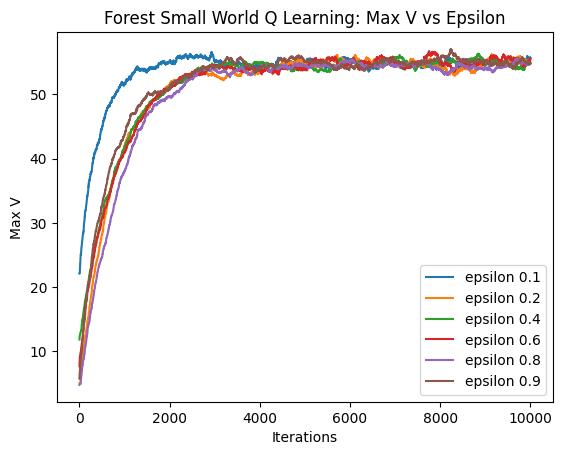

In [26]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Max V'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Max V'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Max V'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Max V'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Max V'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Max V'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Small World Q Learning: Max V vs Epsilon')
plt.legend()
plt.savefig('./plots/forest_small_QL_maxv_eps.png')
plt.show()

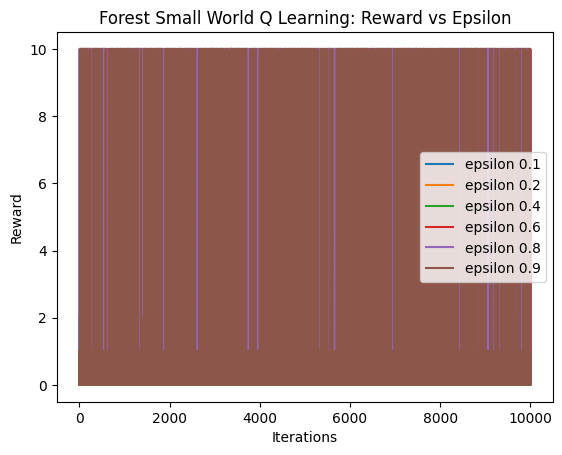

In [25]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Reward'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Reward'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Reward'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Reward'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Reward'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Reward'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Small World Q Learning: Reward vs Epsilon')
plt.legend()
#plt.savefig('./plots/forest_small_QL_reward_eps.png')
plt.show()

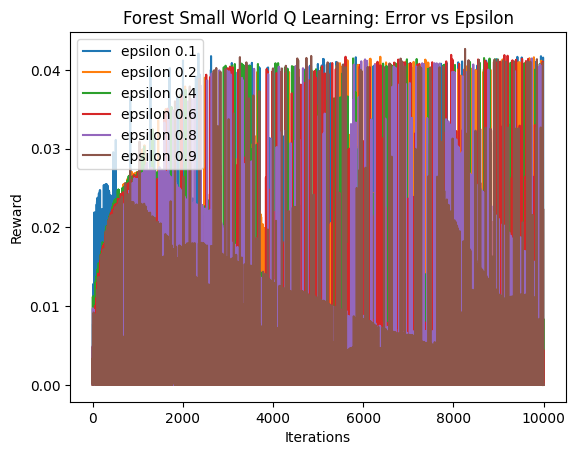

In [27]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Error'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Error'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Error'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Error'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Error'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Error'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Small World Q Learning: Error vs Epsilon')
plt.legend()
#plt.savefig('./plots/forest_small_QL_reward_eps.png')
plt.show()

              epsilon        Time  Iteration      Max V
epsilon                                                
0.1     9999      0.1  220.917097   10000000  55.746217
0.2     9999      0.2  221.544879   10000000  55.478114
0.4     9999      0.4  221.337894   10000000  55.030104
0.6     9999      0.6  222.129504   10000000  55.529861
0.8     9999      0.8  221.811812   10000000  54.797635
0.9     9999      0.9  222.821027   10000000  54.779123


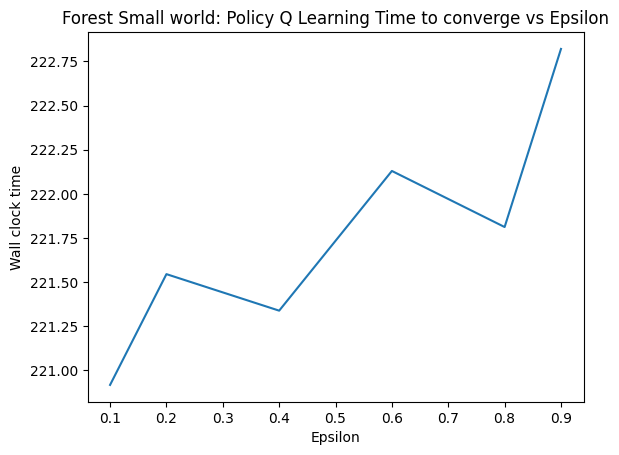

In [29]:
qlg = pd.DataFrame(qlearn_df[['epsilon','Time','Iteration','Max V']].
                   groupby('epsilon').apply(lambda x: x.iloc[[ -1]]))
print(qlg)

plt.plot(qlg['epsilon'], qlg['Time'])
plt.xlabel('Epsilon')
plt.ylabel('Wall clock time')
plt.title('Forest Small world: Policy Q Learning Time to converge vs Epsilon')
plt.savefig('./plots/forest_small_ql_time_eps.png')
plt.show()

In [30]:
ql = QLearning(mdp_p, mdp_r, n_iter=1e7, gamma=0.9, alpha=0.8, epsilon=0.1)
ql.run()
ql_policy = ql.policy

In [31]:
ql_policy

(0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0)